In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [3]:
with open("binarymatrix.npy", "br") as f:
    narrowband= np.load(f)

frequency_width = 50
time_duration = 0.02

start_fre = 2000
end_fre = 10000

fs = 96000
fft_number = 1024
hop_size = 512
dt = hop_size/96000
df = fs/fft_number

f = np.arange(1024/2+1)*fs/1024

start_fre = 2000
end_fre = 10000

start_index = math.floor((start_fre)/df)
end_index = math.ceil((end_fre)/df)
width_size = math.ceil(frequency_width/2/df)

col_size = math.ceil(time_duration/dt)
row_size = math.ceil(frequency_width/df)
print("col size: {}".format(col_size))
print("row size: {}".format(row_size))

col size: 4
row size: 1


In [4]:
image_row = narrowband.T.shape[0]
image_col = narrowband.T.shape[1]
print("image row size: {}".format(image_row))
print("image col size: {}".format(image_col))

image row size: 86
image col size: 936


In [5]:
padding = np.zeros((image_row+row_size-1, image_col+col_size-1))

In [6]:
padding[row_size//2:row_size//2+image_row,col_size//2:col_size//2+image_col] = narrowband.T

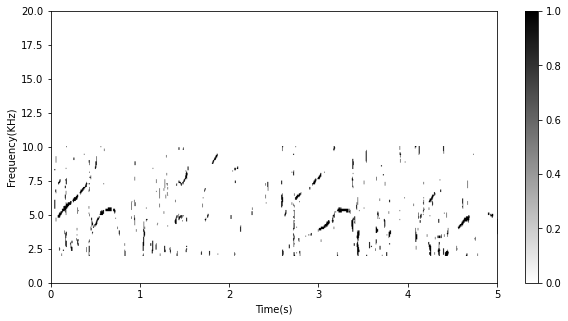

In [7]:
fs = 96000
fig, ax = plt.subplots(figsize=(10,5))
im = ax.imshow(narrowband.T, cmap='binary',  origin='lower', aspect='auto',
               interpolation='hanning', extent=(0, 5, f[start_index]/1000, f[end_index]/1000))
ax.set_ylim([0,20])
ax.set_xlabel("Time(s)")
ax.set_ylabel("Frequency(KHz)")
c_bar = fig.colorbar(im)
plt.show()

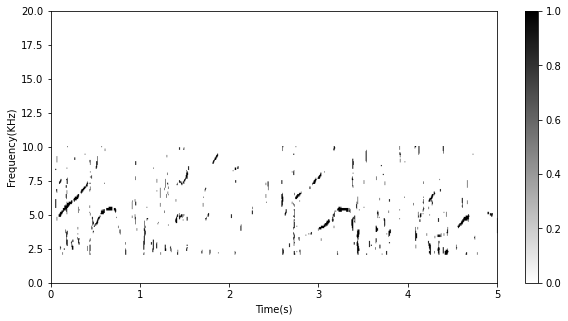

In [7]:
fs = 96000
fig, ax = plt.subplots(figsize=(10,5))
im = ax.imshow(padding, cmap='binary',  origin='lower', aspect='auto',
               interpolation='hanning', extent=(0, 5, f[start_index]/1000, f[end_index]/1000))
ax.set_ylim([0,20])
ax.set_xlabel("Time(s)")
ax.set_ylabel("Frequency(KHz)")
c_bar = fig.colorbar(im)
plt.show()

In [8]:
padding_row = padding.shape[0]
padding_col = padding.shape[1]
print("padding row size: {}".format(padding_row))
print("padding col size: {}".format(padding_col))

padding row size: 87
padding col size: 939


In [9]:
import time
start = time.time()

frequency_width = 150
time_duration = 0.02

start_fre = 2000
end_fre = 10000

fs = 96000
fft_number = 1024
hop_size = 512
dt = hop_size/96000
df = fs/fft_number

f = np.arange(1024/2+1)*fs/1024

start_fre = 2000
end_fre = 10000

start_index = math.floor((start_fre)/df)
end_index = math.ceil((end_fre)/df)
width_size = math.ceil(frequency_width/2/df)

col_size = math.ceil(time_duration/dt)
row_size = math.ceil(frequency_width/df)

padding = np.zeros((image_row+row_size-1, image_col+col_size-1))
padding[row_size//2:row_size//2+image_row,col_size//2:col_size//2+image_col] = narrowband.T

print("col size: {}".format(col_size))
print("row size: {}".format(row_size))
print("image row size: {}".format(image_row))
print("image col size: {}".format(image_col))
detection = np.zeros((image_row, image_col))
for i in range(image_row):
    for j in range(image_col):
        segment = padding[i:i+row_size,j:j+col_size]
        detection[i,j] = np.sum(np.sum(segment, axis=0)>0)
end = time.time()
print("elapsed time: {}".format(end-start))

col size: 4
row size: 2
image row size: 86
image col size: 936
elapsed time: 0.7764987945556641


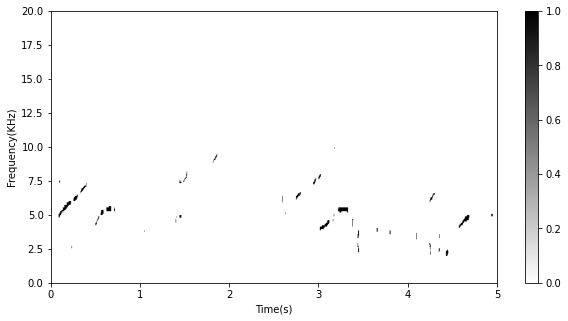

In [10]:
fs = 96000
fig, ax = plt.subplots(figsize=(10,5))
im = ax.imshow(detection>3, cmap='binary',  origin='lower', aspect='auto',
               interpolation='hanning', extent=(0, 5, f[start_index]/1000, f[end_index]/1000))
ax.set_ylim([0,20])
ax.set_xlabel("Time(s)")
ax.set_ylabel("Frequency(KHz)")
c_bar = fig.colorbar(im)
plt.show()